In [ ]:
!pip install pgmpy

## Problema 1

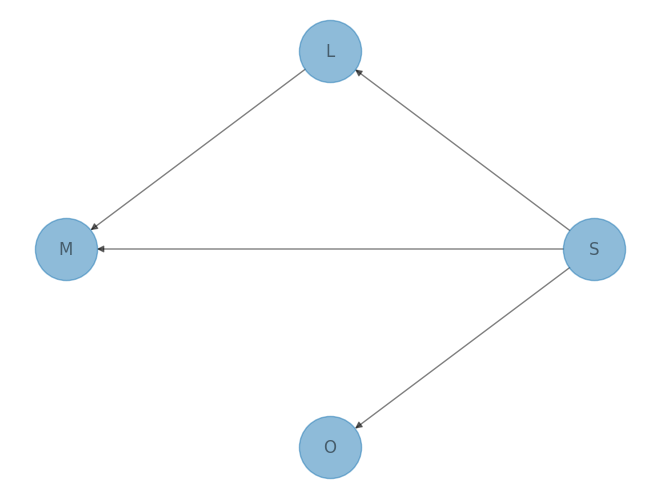

In [ ]:

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

problem_model = DiscreteBayesianNetwork([('S', 'L'), ('S', 'M'), ('S', 'O'),
                                ('L', 'M')])

pos = nx.circular_layout(problem_model)
nx.draw(problem_model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)
plt.show()

In [ ]:
CPD_S= TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])
print(CPD_S)

CPD_O = TabularCPD(variable='O',
                   variable_card=2,
                   values=[[0.9, 0.3], # P(O=0 | S=0), P(O=0 | S=1)
                           [0.1, 0.7]],  # P(O=1 | S=0), P(O=1 | S=1)
                   evidence=['S'],
                   evidence_card=[2])
print(CPD_O)

CPD_L = TabularCPD(variable='L',
                   variable_card=2,
                   values=[[0.7, 0.2], # P(L=0 | S=0), P(L=0 | S=1)
                           [0.3, 0.8]],  # P(L=1 | S=0), P(L=1 | S=1)
                   evidence=['S'],
                   evidence_card=[2])
print(CPD_L)

CPD_M = TabularCPD(variable='M',
                   variable_card=2,
                   values=[[0.8, 0.4, 0.5, 0.1],
                           [0.2, 0.6, 0.5, 0.9]],
                   evidence=['S', 'L'],
                   evidence_card=[2, 2])

print(CPD_M)


+------+-----+
| S(0) | 0.6 |
+------+-----+
| S(1) | 0.4 |
+------+-----+
+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| O(0) | 0.9  | 0.3  |
+------+------+------+
| O(1) | 0.1  | 0.7  |
+------+------+------+
+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| L(0) | 0.7  | 0.2  |
+------+------+------+
| L(1) | 0.3  | 0.8  |
+------+------+------+
+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| L    | L(0) | L(1) | L(0) | L(1) |
+------+------+------+------+------+
| M(0) | 0.8  | 0.4  | 0.5  | 0.1  |
+------+------+------+------+------+
| M(1) | 0.2  | 0.6  | 0.5  | 0.9  |
+------+------+------+------+------+


In [ ]:
problem_model.add_cpds(CPD_S, CPD_O, CPD_L, CPD_M)
problem_model.get_cpds()

[<TabularCPD representing P(S:2) at 0x7ee9d72dcfb0>,
 <TabularCPD representing P(O:2 | S:2) at 0x7ee9d72dc680>,
 <TabularCPD representing P(L:2 | S:2) at 0x7ee9d72dfa10>,
 <TabularCPD representing P(M:2 | S:2, L:2) at 0x7ee9d72de2a0>]

In [ ]:
problem_model.check_model()

problem_model.local_independencies(['S', 'O', 'L', 'M'])

(O ⟂ M, L | S)
(L ⟂ O | S)
(M ⟂ O | S, L)

In [ ]:
from pgmpy.inference import VariableElimination

inference_engine = VariableElimination(problem_model)

posterior_p = inference_engine.query(['S'], evidence={'O':0, 'L':1, 'M':0})
print(posterior_p)

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8710 |
+------+----------+
| S(1) |   0.1290 |
+------+----------+


## Problema 2

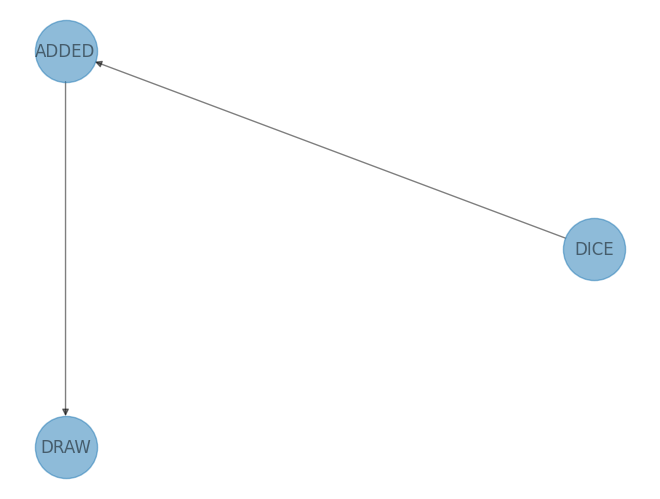

+---------+----------+
| DICE(1) | 0.166667 |
+---------+----------+
| DICE(2) | 0.166667 |
+---------+----------+
| DICE(3) | 0.166667 |
+---------+----------+
| DICE(4) | 0.166667 |
+---------+----------+
| DICE(5) | 0.166667 |
+---------+----------+
| DICE(6) | 0.166667 |
+---------+----------+
+--------------+---------+---------+---------+---------+---------+---------+
| DICE         | DICE(1) | DICE(2) | DICE(3) | DICE(4) | DICE(5) | DICE(6) |
+--------------+---------+---------+---------+---------+---------+---------+
| ADDED(red)   | 0.0     | 0.0     | 0.0     | 0.0     | 0.0     | 1.0     |
+--------------+---------+---------+---------+---------+---------+---------+
| ADDED(blue)  | 1.0     | 0.0     | 0.0     | 1.0     | 0.0     | 0.0     |
+--------------+---------+---------+---------+---------+---------+---------+
| ADDED(black) | 0.0     | 1.0     | 1.0     | 0.0     | 1.0     | 0.0     |
+--------------+---------+---------+---------+---------+---------+---------+
+-------

In [ ]:
problem2 = DiscreteBayesianNetwork([("DICE", "ADDED"), ("ADDED", "DRAW")])

pos = nx.circular_layout(problem2)
nx.draw(problem2, with_labels=True, pos=pos, alpha=0.5, node_size=2000)
plt.show()

CPD_dice = TabularCPD(
    variable='DICE',
    variable_card=6,
    values=[[1/6], [1/6], [1/6], [1/6], [1/6], [1/6]],
    state_names={'DICE': [1, 2, 3, 4, 5, 6]}
)
print(CPD_dice)

CPD_added = TabularCPD(
    variable='ADDED',
    variable_card=3,
    values=[
        [0, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 1, 0]
    ],
    evidence=['DICE'],
    evidence_card=[6],
    state_names={
        'ADDED': ['red', 'blue', 'black'],
        'DICE': [1, 2, 3, 4, 5, 6]
    }
)
print(CPD_added)

CPD_draw = TabularCPD(
    variable='DRAW',
    variable_card=3,
    values=[
        [4/10, 3/10, 3/10],
        [4/10, 5/10, 4/10],
        [2/10, 2/10, 3/10],
    ],
    evidence=['ADDED'],
    evidence_card=[3],
    state_names={
        'DRAW': ['red', 'blue', 'black'],
        'ADDED': ['red', 'blue', 'black']
    }
)
print(CPD_draw)

In [ ]:
problem2.add_cpds(CPD_dice, CPD_added, CPD_draw)
problem2.get_cpds()

[<TabularCPD representing P(DICE:6) at 0x7ee9d76f5700>,
 <TabularCPD representing P(ADDED:3 | DICE:6) at 0x7ee9dd2185c0>,
 <TabularCPD representing P(DRAW:3 | ADDED:3) at 0x7ee9dd850590>]

In [ ]:
problem2.check_model()

problem2.local_independencies(['DICE', 'ADDED', 'DRAW'])


from pgmpy.sampling import BayesianModelSampling

sampler = BayesianModelSampling(problem2)
samples = sampler.forward_sample(size=1000)


p_red = (samples["DRAW"] == "red").mean()
print("P(DRAW='red') ≈", p_red)

  0%|          | 0/3 [00:00<?, ?it/s]

P(DRAW='red') ≈ 0.31


## Problema 3

In [ ]:
#Punctul 1

import numpy as np

N=10000
P0_win_rate = 0
P1_win_rate = 0

for _ in range(N):
  n = 0
  m = 0

  coin_flip=np.random.choice(['head', 'tail'])    # head - P0     tail - P1

  if coin_flip == 'head':
    n = np.random.randint(1,7)

    for _ in range(2*n):
      coin_flip2=np.random.choice(['head', 'tail'], p=[4/7, 3/7])

      if coin_flip2 == 'head': m+=1

    if n >= m:
      P0_win_rate +=1
    else:
      P1_win_rate +=1
  else:
    n = np.random.randint(1,7)

    for _ in range(2*n):
      coin_flip2=np.random.choice(['head', 'tail'], p=[0.5, 0.5])

      if coin_flip2 == 'head': m+=1

    if n >= m:
      P1_win_rate +=1
    else:
      P0_win_rate +=1


if P0_win_rate >= P1_win_rate:
  print("P0_win_rate =", P0_win_rate / N)
else:
  print("P1_win_rate =", P1_win_rate / N)





P1_win_rate = 0.5732


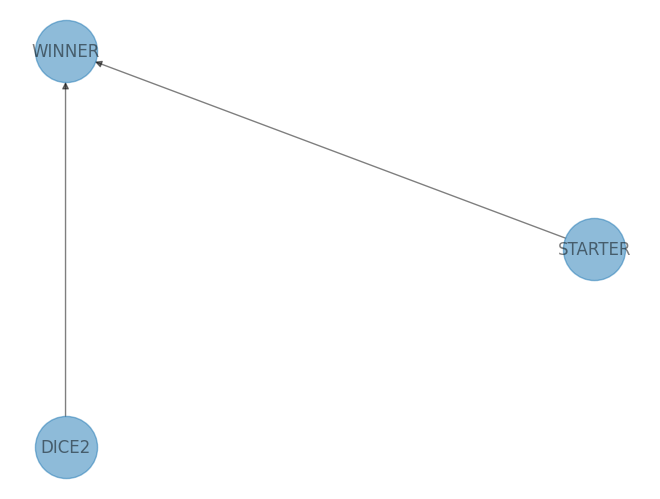

+-------------+-----+
| STARTER(P0) | 0.5 |
+-------------+-----+
| STARTER(P1) | 0.5 |
+-------------+-----+
+------------+-------------+-----+-------------+-------------+
| STARTER    | STARTER(P0) | ... | STARTER(P1) | STARTER(P1) |
+------------+-------------+-----+-------------+-------------+
| DICE2      | DICE2(1)    | ... | DICE2(5)    | DICE2(6)    |
+------------+-------------+-----+-------------+-------------+
| WINNER(P0) | 0.18        | ... | 0.62        | 0.61        |
+------------+-------------+-----+-------------+-------------+
| WINNER(P1) | 0.82        | ... | 0.38        | 0.39        |
+------------+-------------+-----+-------------+-------------+


In [ ]:
#Punctul 2

from re import escape
from scipy.stats import binom
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

ex3= DiscreteBayesianNetwork([('STARTER', 'WINNER'), ('DICE2', 'WINNER')])

pos = nx.circular_layout(ex3)
nx.draw(ex3, with_labels=True, pos=pos, alpha=0.5, node_size=2000)
plt.show()

CPD_starter = TabularCPD(
    variable='STARTER',
    variable_card=2,
    values=[[0.5], [0.5]],
    state_names={'STARTER': ['P0', 'P1']}
)

CPD_dice2 = TabularCPD(
    variable='DICE2',
    variable_card=6,
    values=[[1/6], [1/6], [1/6], [1/6], [1/6], [1/6]],
    state_names={'DICE2': [1, 2, 3, 4, 5, 6]}
)

CPD_winner = TabularCPD(
    variable='WINNER',
    variable_card=2,             # P(WINNER = P0 | STERTER = P0 , DICE = 1 ....)
    values=[[round(binom.cdf(0, 2, 4/7), 2), round(binom.cdf(1, 4, 4/7), 2), round(binom.cdf(2, 6, 4/7), 2), round(binom.cdf(3, 8, 4/7), 2), round(binom.cdf(4, 10, 4/7), 2), round(binom.cdf(5, 12, 4/7), 2),
             round(1-binom.cdf(0, 2, 1/2), 2), round(1-binom.cdf(1, 4, 1/2), 2), round(1-binom.cdf(2, 6, 1/2), 2), round(1-binom.cdf(3, 8, 1/2), 2), round(1-binom.cdf(4, 10, 1/2), 2), round(1-binom.cdf(5, 12, 1/2), 2)],
            [round(1-binom.cdf(0, 2, 4/7), 2), round(1-binom.cdf(1, 4, 4/7), 2), round(1-binom.cdf(2, 6, 4/7), 2), round(1-binom.cdf(3, 8, 4/7), 2), round(1-binom.cdf(4, 10, 4/7), 2), round(1-binom.cdf(5, 12, 4/7), 2),
             round(binom.cdf(0, 2, 1/2), 2), round(binom.cdf(1, 4, 1/2), 2), round(binom.cdf(2, 6, 1/2), 2), round(binom.cdf(3, 8, 1/2), 2), round(binom.cdf(4, 10, 1/2), 2), round(binom.cdf(5, 12, 1/2), 2)]
    ],
    evidence=['STARTER','DICE2'],
    evidence_card=[2, 6],
    state_names={
        'WINNER': ['P0', 'P1'],
        'STARTER': ['P0', 'P1'],
        'DICE2': [1, 2, 3, 4, 5, 6]
    }
)

''' DISTRIBUTIA PENTRU WINNER
|    STARTER      |              P0                  |                    P1                          |
|     DICE        | 1    | 2    | 3    | 4    | 5    | 6    | 1    | 2    | 3    | 4    | 5    | 6    |
| --------------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **WINNER = P0** | 0.18 | 0.21 | 0.22 | 0.22 | 0.22 | 0.21 | 0.75 | 0.69 | 0.66 | 0.64 | 0.62 | 0.61 |
| **WINNER = P1** | 0.82 | 0.79 | 0.78 | 0.78 | 0.78 | 0.79 | 0.25 | 0.31 | 0.34 | 0.36 | 0.38 | 0.39 |
'''


print(CPD_starter)
print(CPD_winner)


In [ ]:
ex3.add_cpds(CPD_starter, CPD_dice2, CPD_winner)
ex3.get_cpds()

ex3.check_model()

ex3.local_independencies(['STARTER', 'DICE2', 'WINNER'])

(STARTER ⟂ DICE2)
(DICE2 ⟂ STARTER)

In [ ]:
#Punctul 3

from pgmpy.inference import VariableElimination

inference = VariableElimination(ex3)

p = inference.query(['WINNER'], evidence={'STARTER':'P0',})   # P1 - da cu banul in runda 2
print(p)

p = inference.query(['WINNER'], evidence={'STARTER':'P1'})    # P0 -  da cu banul in runda 2
print(p)

''' In concluzie P1 este mai predispus sa inceapa jocul daca in a 2 a runda se da un singur head '''

+------------+---------------+
| WINNER     |   phi(WINNER) |
+============+===============+
| WINNER(P0) |        0.2100 |
+------------+---------------+
| WINNER(P1) |        0.7900 |
+------------+---------------+
+------------+---------------+
| WINNER     |   phi(WINNER) |
+============+===============+
| WINNER(P0) |        0.6617 |
+------------+---------------+
| WINNER(P1) |        0.3383 |
+------------+---------------+


' In concluzie P1 este mai predispus sa inceapa jocul daca in a 2 a runda se da un singur head '